In [1]:
COREGRAPH = 'dataset/bandwidth/263enc_spare.txt'

In [2]:
import numpy as np
data = np.loadtxt(COREGRAPH, dtype=int)
data

array([[    0,     1, 38001],
       [    0,     2,   193],
       [    0,     3, 24634],
       [    0,     5, 38016],
       [    0,     7,    25],
       [    1,     4, 38001],
       [    2,     3, 37958],
       [    2,     6, 46733],
       [    7,     8,  2083],
       [    8,    11,    10],
       [    9,    10,  4060],
       [   10,    11,   500],
       [   12,     1, 38001],
       [   12,     2,   193],
       [   12,     3, 24634],
       [   12,     5, 38016],
       [   12,     7,    25]])

In [3]:
from optimisers.nsga_ii import NSGA_II

nsga_ii = NSGA_II(n_tournaments=30)
nsga_ii.intialize_population(
    n_solutions=1000,
    n_cores=13,
    es_bit=3,
    el_bit=2,
    mesh_2d_shape=(4, 4),
    core_graph=data,
)

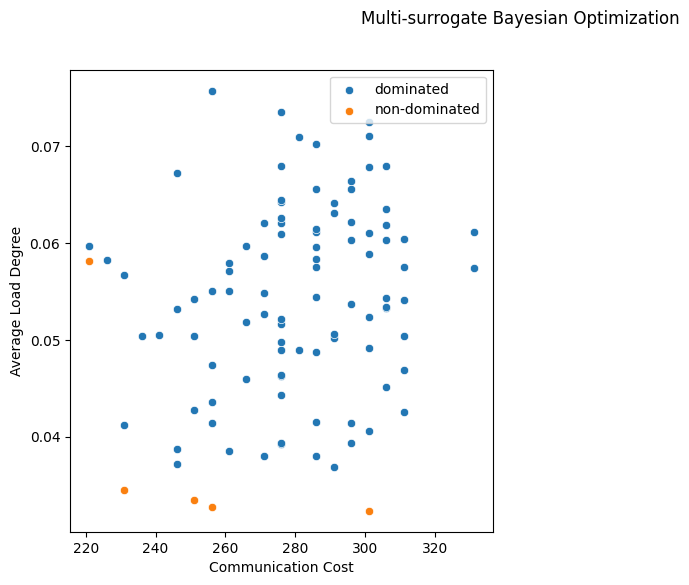

In [4]:
nsga_ii.non_dominated_sorting()
nsga_ii.visualize_objective_space('Multi-surrogate Bayesian Optimization', figsize=(12, 6), labels=['Communication Cost', 'Average Load Degree'])

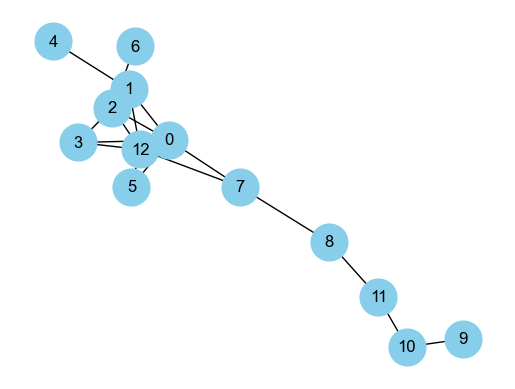

In [5]:
nsga_ii.population[0].visualize_core_graph()

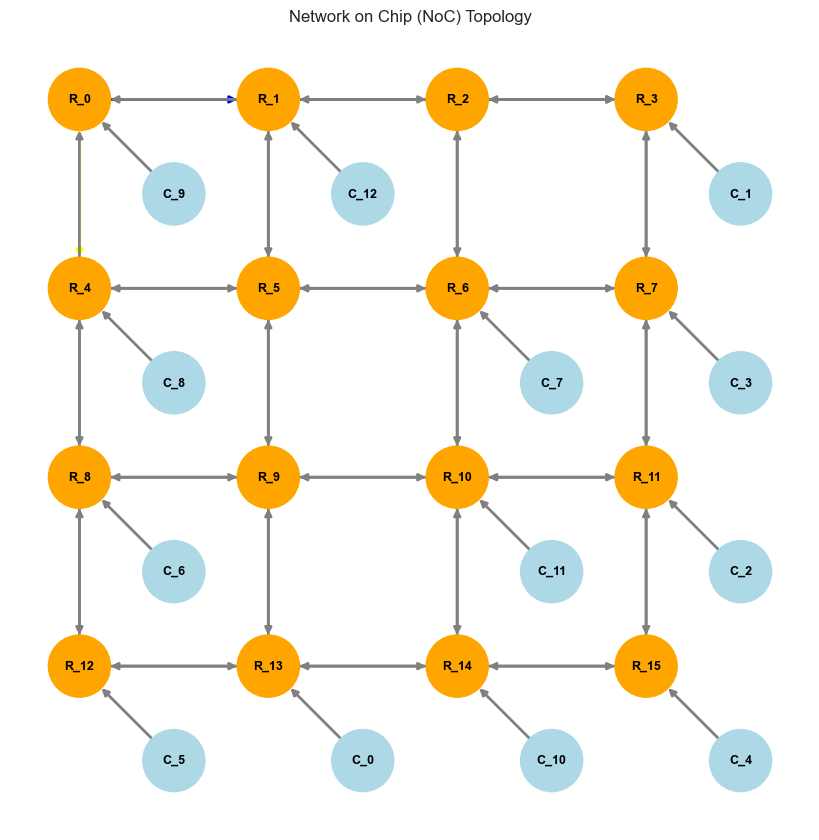

In [6]:
nsga_ii.population[0].visualize_NoC()

In [9]:
nsga_ii.optimize(n_evaluations=1000)

	Evaluation:  51
	Evaluation:  52
	Evaluation:  53
	Evaluation:  54
	Evaluation:  55
	Evaluation:  56


/Users/dathd6/Developments/Network-on-Chips-Application-Mapping/optimisers/nsga_ii.py:27: RuntimeWarning: invalid value encountered in divide
  normalized_fitnesses[:, j] = (fitnesses[:, j] - min_val) / val_range


	Evaluation:  57
	Evaluation:  58
	Evaluation:  59
	Evaluation:  60
	Evaluation:  61
	Evaluation:  62
	Evaluation:  63
	Evaluation:  64
	Evaluation:  65
	Evaluation:  66
	Evaluation:  67
	Evaluation:  68
	Evaluation:  69
	Evaluation:  70
	Evaluation:  71
	Evaluation:  72
	Evaluation:  73
	Evaluation:  74
	Evaluation:  75
	Evaluation:  76
	Evaluation:  77
	Evaluation:  78
	Evaluation:  79
	Evaluation:  80
	Evaluation:  81
	Evaluation:  82
	Evaluation:  83
	Evaluation:  84
	Evaluation:  85
	Evaluation:  86
	Evaluation:  87
	Evaluation:  88
	Evaluation:  89
	Evaluation:  90
	Evaluation:  91
	Evaluation:  92
	Evaluation:  93
	Evaluation:  94
	Evaluation:  95
	Evaluation:  96
	Evaluation:  97
	Evaluation:  98
	Evaluation:  99
	Evaluation:  100
	Evaluation:  101
	Evaluation:  102
	Evaluation:  103
	Evaluation:  104
	Evaluation:  105
	Evaluation:  106
	Evaluation:  107
	Evaluation:  108
	Evaluation:  109
	Evaluation:  110
	Evaluation:  111
	Evaluation:  112
	Evaluation:  113
	Evaluation:  114

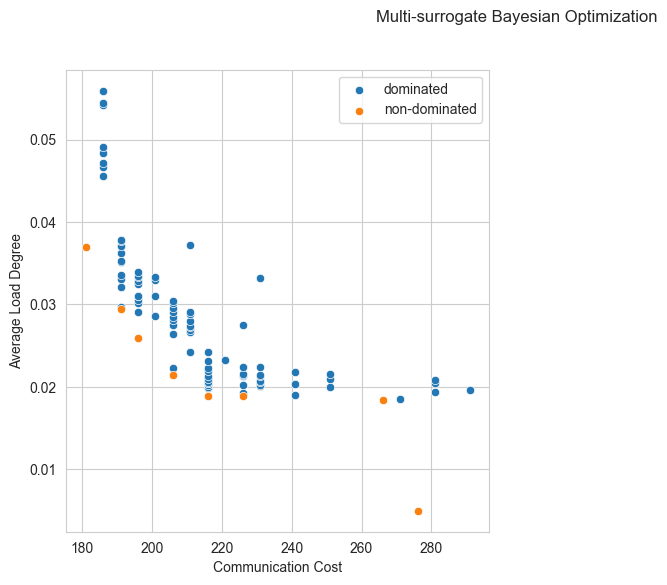

In [10]:
nsga_ii.non_dominated_sorting()
nsga_ii.visualize_objective_space('Multi-surrogate Bayesian Optimization', figsize=(12, 6), labels=['Communication Cost', 'Average Load Degree'])

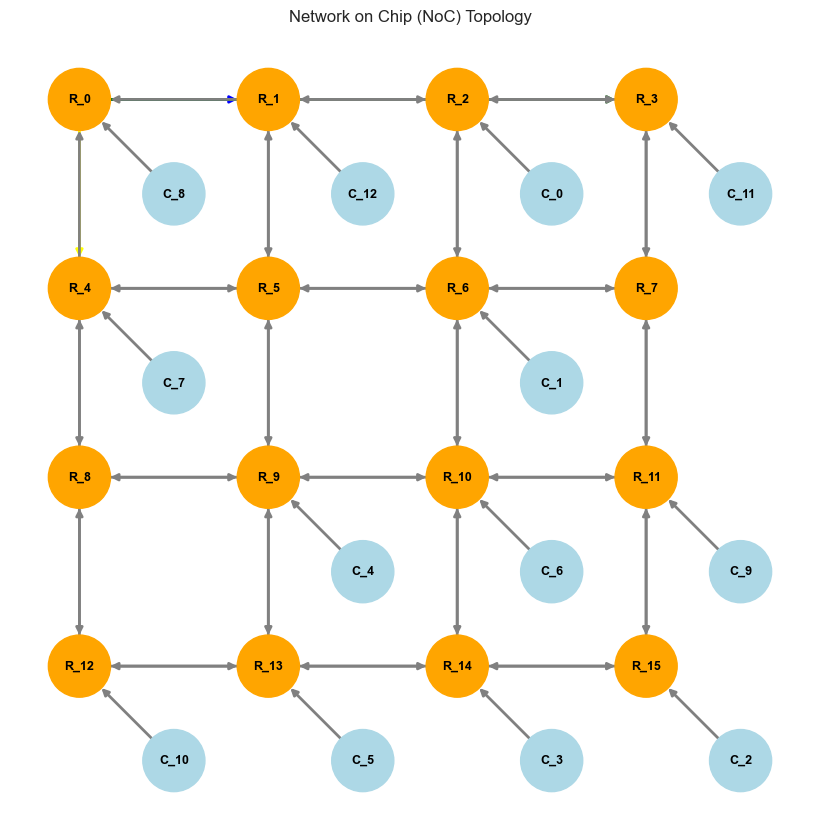

In [14]:
nsga_ii.population[nsga_ii.pareto_fronts[0]][0].visualize_NoC()